Modeling ArcTan
---

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

2d aim
---
place random points and predict the angle.

In [130]:
initializer = keras.initializers.he_normal

pi = np.pi

#make a model
class actor(keras.models.Sequential):
    def __init__(self, num_layers, layer_size):
        super().__init__()
        for layer in range(num_layers):
            self.add(
                keras.layers.Dense(
                                    layer_size,
                                    bias_initializer=initializer,
                                    kernel_initializer=initializer,
                                    activation = 'relu'
                                   )
                    )
        output = keras.layers.Dense(1, activation = 'tanh')
        self.add(output)
        
    def call(self, x, training = True):
        for layer in self.layers:
            x = layer(x, training = training)
        return tf.squeeze(x)

In [180]:
num_trials = 10000
trial_update_period = 100
batches_per_trial = 1000
target_range = 100.

#define rng for random points
seed = 2022
rng = np.random.default_rng(seed)

#create models
act = actor(2, 16)
crit = actor(2, 16)

#define loss function
huber_loss = tf.losses.Huber()

#define optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

losses = []
for trial in range(num_trials):
    targets = rng.uniform(low = -target_range, high = target_range, size = (batches_per_trial,2))
    with tf.GradientTape() as tape:
        targets = tf.constant(targets)
        predicted_angles = pi*act(targets)
        true_angles = tf.math.atan2(targets[:,1],targets[:,0])
        loss = huber_loss(predicted_angles, true_angles)
        losses.append(loss)
    grads = tape.gradient(loss, act.trainable_variables)
    optimizer.apply_gradients(zip(grads, act.trainable_variables))
    if trial%trial_update_period ==0:
        print(f'trial {trial}: loss {loss}')
    optimizer.learning_rate = optimizer.learning_rate*0.99999

trial 0: loss 2.658342123031616
trial 100: loss 2.4892563819885254
trial 200: loss 2.236659288406372
trial 300: loss 0.6689956784248352
trial 400: loss 0.5906776785850525
trial 500: loss 0.5133078694343567
trial 600: loss 0.42622295022010803
trial 700: loss 0.3608758747577667
trial 800: loss 0.29511189460754395
trial 900: loss 0.35593339800834656
trial 1000: loss 0.20775626599788666
trial 1100: loss 0.19626742601394653
trial 1200: loss 0.1967470645904541
trial 1300: loss 0.21345485746860504
trial 1400: loss 0.17821508646011353
trial 1500: loss 0.17762991786003113
trial 1600: loss 0.20007635653018951
trial 1700: loss 0.1343928873538971
trial 1800: loss 0.11143303662538528
trial 1900: loss 0.1427234262228012
trial 2000: loss 0.10757298022508621
trial 2100: loss 0.08159295469522476
trial 2200: loss 0.07424650341272354
trial 2300: loss 0.06464952230453491
trial 2400: loss 0.05005797743797302
trial 2500: loss 0.11662865430116653
trial 2600: loss 0.04530541971325874
trial 2700: loss 0.051160

In [185]:
optimizer.learning_rate

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.00090471253>

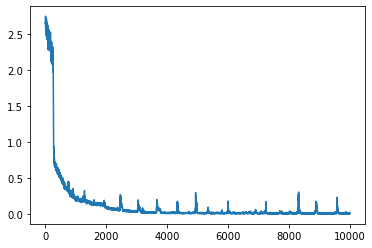

In [186]:
plt.plot(losses)

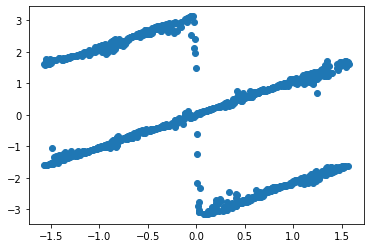

In [187]:
reals =  list(map(lambda target: np.arctan(target[1]/target[0]), targets))
preds =  pi*act(targets)

plt.scatter(reals, preds)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

Extra lines are due to ambiguity of 1st / 3rd quadrants. This is a success.

(array([39., 61., 69., 43., 49., 33., 64., 67., 45., 26., 47., 38., 67.,
        55., 29., 58., 51., 66., 62., 31.]),
 array([-3.1414943 , -2.8280833 , -2.5146723 , -2.201261  , -1.88785   ,
        -1.574439  , -1.261028  , -0.94761693, -0.63420594, -0.32079488,
        -0.00738382,  0.30602723,  0.6194383 ,  0.9328493 ,  1.2462604 ,
         1.5596714 ,  1.8730824 ,  2.1864934 ,  2.4999046 ,  2.8133156 ,
         3.1267266 ], dtype=float32),
 <BarContainer object of 20 artists>)

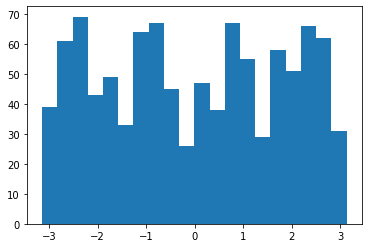

In [188]:
plt.hist(pi*np.array(tf.convert_to_tensor(act(targets))), bins = 20)